In [1]:
import pandas as pd
import requests
from IPython.display import Image
from IPython.core.display import HTML

If running the API locally, set the url to ```http://127.0.0.1:5000/api/v1/```  
I have an instance of the latest API running on our EC2 machine with 2vCPU cores and 8GB ram. It will still likely be faster on your own computer

In [2]:
url = "http://13.212.85.6:5000/api/v1/" # running on ec2 instance

## Available Endpoints

### 1. ```cam_metadata```  

No parameters required, returns dictionary of the camera locations, etc


In [3]:
r = requests.get(url+"cam_metadata")

In [4]:
pd.DataFrame(r.json()).head()

,Latitude,Longitude,Dir1Distance,Dir2Distance,Dir1Lanes,Dir2Lanes,DirCoords
1001,1.295313,103.871146,75,75.0,2,3.0,"[[(64, 230), (64, 220), (63, 216), (63, 196), ..."
1002,1.319541,103.878563,125,NaN,2,NaN,"[[(5, 236), (6, 224), (6, 221), (6, 206), (6, ..."
1003,1.323957,103.872858,100,150.0,3,4.0,"[[(36, 231), (36, 218), (32, 201), (32, 187), ..."
1004,1.319536,103.875067,150,75.0,2,2.0,"[[(103, 110), (113, 106), (113, 106), (115, 10..."
1005,1.363520,103.905394,100,150.0,3,3.0,"[[(8, 117), (14, 116), (26, 115), (32, 111), (..."


### 2. ```cam_images```

Returns ```{CameraID, Latitude, Longitude, ImageLink, timestamp}```  
You can get links to download/display the images here

In [5]:
r = requests.get(url+"cam_images")
pd.DataFrame(r.json()).head()

,CameraID,Latitude,Longitude,ImageLink,timestamp
0,1001,1.295313,103.871146,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000
1,1002,1.319541,103.878563,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000
2,1003,1.323957,103.872858,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000
3,1004,1.319536,103.875067,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000
4,1005,1.363520,103.905394,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000


### 3. ```speed_bands```

Returns ```{LinkID,RoadName,RoadCategory,SpeedBand,MinimumSpeed,MaximumSpeed,latitude1,longitude1,latitude2,longitude2,distance,timestamp}```  
but I don't think we have much use for this

In [6]:
r = requests.get(url+"speed_bands")
pd.DataFrame(r.json()).head()

,LinkID,RoadName,RoadCategory,SpeedBand,MinimumSpeed,MaximumSpeed,latitude1,longitude1,latitude2,longitude2,distance,timestamp
0,103000000,KENT ROAD,E,3,20,29,1.3170142376560023,103.85298052044503,1.3166840028663076,103.85259882242372,0.056017,1666625460000
1,103000010,BUCKLEY ROAD,E,6,50,59,1.3166507852203482,103.84102305136321,1.316912438354752,103.84022564204443,0.093341,1666625460000
2,103000011,BUCKLEY ROAD,E,6,50,59,1.316912438354752,103.84022564204443,1.3166507852203482,103.84102305136321,0.093341,1666625460000
3,103000014,SHREWSBURY ROAD,E,5,40,49,1.3186726294030418,103.84700267615683,1.3180212058893457,103.84711392225329,0.073087,1666625460000
4,103000015,SHREWSBURY ROAD,E,5,40,49,1.3180212058893457,103.84711392225329,1.3186726294030418,103.84700267615683,0.073087,1666625460000


### 4. ```traffic_incidents```
Returns ```{Type,Latitude,Longitude,Message,timestamp}```  
Maybe can make like a latest updates sidebar displaying this stuff

In [7]:
r = requests.get(url+"traffic_incidents")
pd.DataFrame(r.json()).head()

,Type,Latitude,Longitude,Message,timestamp
0,Vehicle breakdown,1.353947,103.727416,Vehicle breakdown on PIE (towards Tuas) after...,1666624080000
1,Roadwork,1.376238,103.910285,Roadworks on KPE (towards TPE) before Halus L...,1666621620000
2,Roadwork,1.338307,103.677429,Roadworks on PIE (towards Changi Airport) aft...,1666619880000
3,Roadwork,1.306089,103.771215,Roadworks on Clementi Road (towards AYE) afte...,1666617300000
4,Roadwork,1.306651,103.819419,Roadworks on Napier Road (towards Cluny Road)...,1666613760000


### 5. ```density```

**Params** :  
- ```CameraID``` <int>  : you must specify a CameraID for this request. eg: 1702
- ```prob```     <bool> : optional. if set to ```True```, the probabilities will be returned instead of density

Returns ```{CameraID, Latitude, Longitude, ImageLink, timestamp, density1, density2}```

In [3]:
params = {"cameraID":1702}

In [9]:
r = requests.get(url+"density", params=params)
pd.DataFrame(r.json())

,CameraID,Latitude,Longitude,ImageLink,timestamp,density1,density2
0,1702,1.34355,103.860198,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625460000,36.667,29.333


In [4]:
params = {"cameraID":1702, "prob":True}

In [5]:
r = requests.get(url+"density", params=params)
data = pd.DataFrame(r.json())

In [6]:
data

,CameraID,Latitude,Longitude,ImageLink,timestamp,density1,density2
0,1702,1.34355,103.860198,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666626600000,0.322585,0.16


In [7]:
img = requests.get(data.ImageLink[0]).content

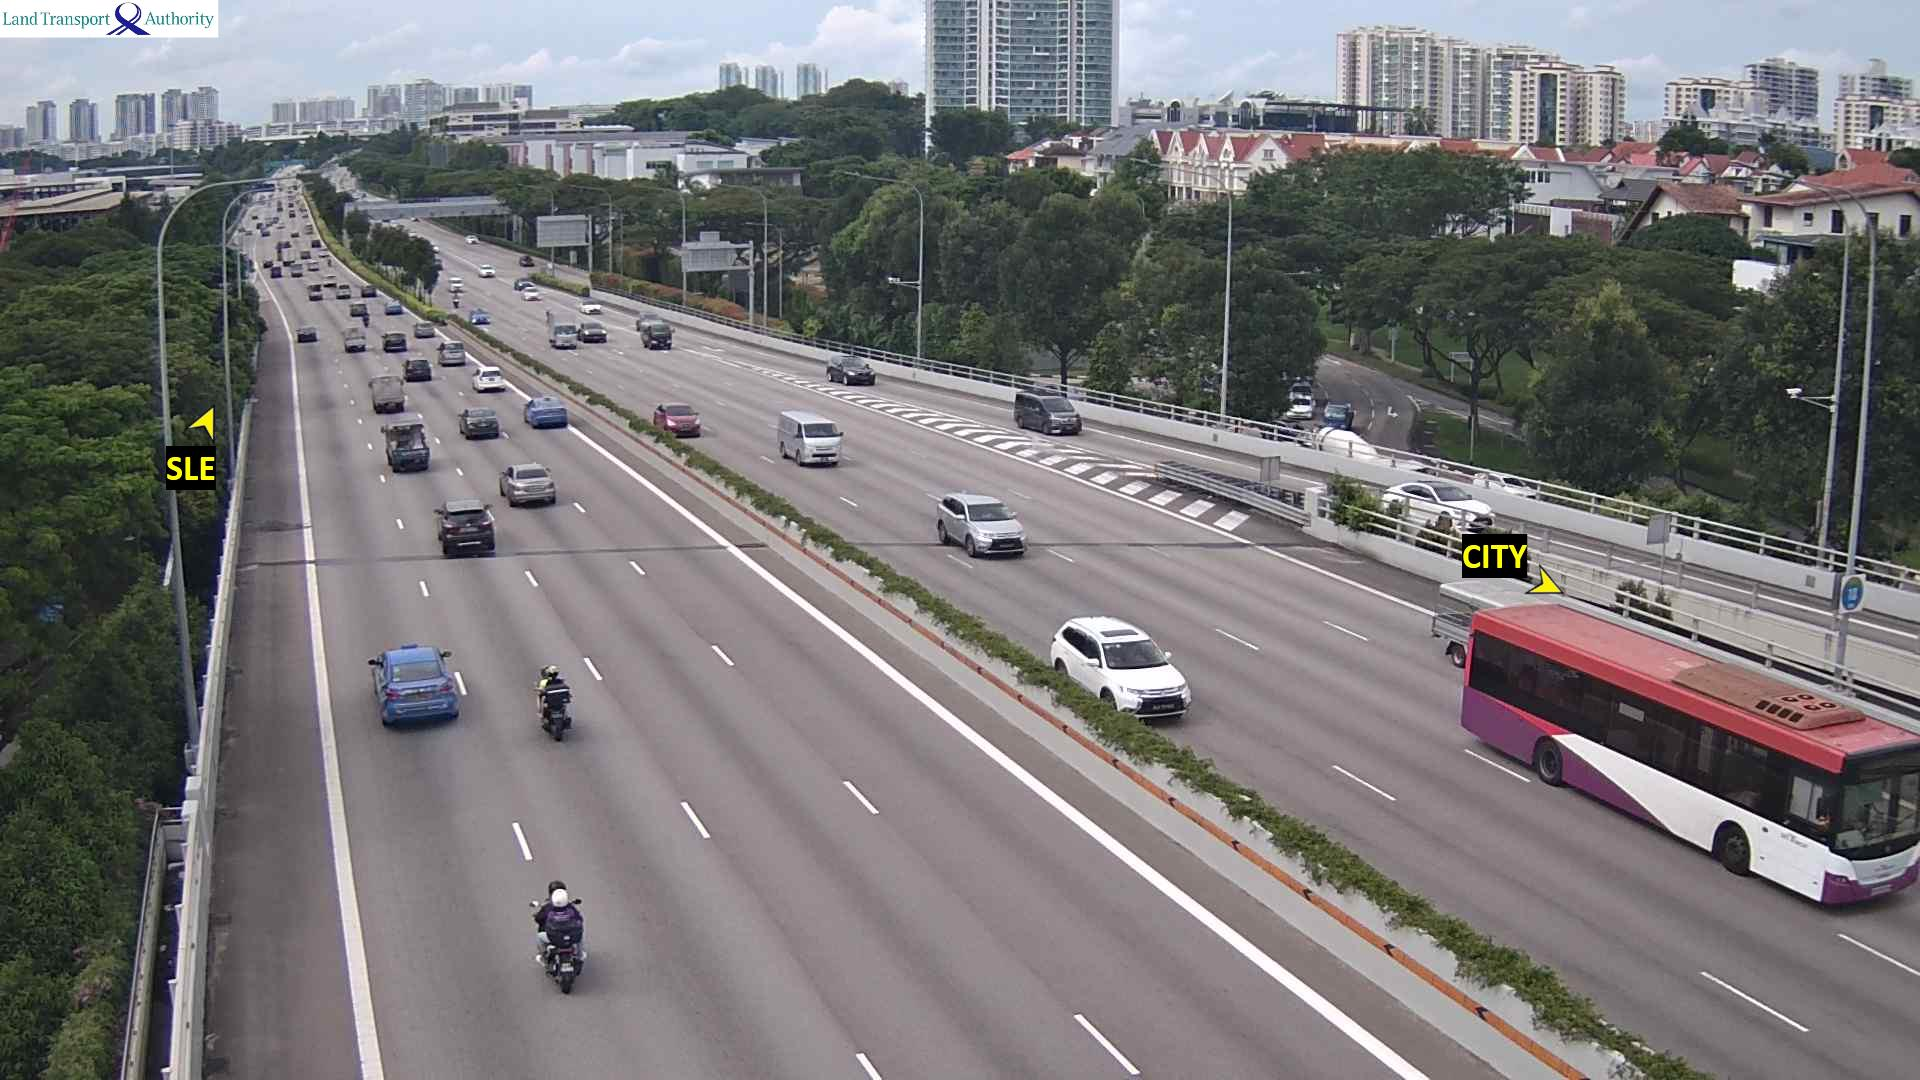

In [8]:
Image(img)

### 6. ```batch_inference```

Returns the exact same parameters as ```density```, but for all cameras available. This request will obviously take some time.  
The EC2 machine is still kinda slow for this. It takes nearly 6 minutes. Running it on my laptop, I can finish the request in 2 minutes.

In [15]:
r = requests.get(url+"batch_inference", params=params)

In [18]:
pd.DataFrame(r.json())

,CameraID,Latitude,Longitude,ImageLink,timestamp,density1,density2,prob1,prob2
0,1001,1.295313,103.871146,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,0.000,0.000,0.00000,0.000000
1,1002,1.319541,103.878563,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,0.000,0.000,0.00000,0.000000
2,1003,1.323957,103.872858,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,0.000,0.000,0.00000,0.000000
3,1004,1.319536,103.875067,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,0.000,0.000,0.00000,0.000000
4,1005,1.363520,103.905394,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,0.000,0.000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
82,9702,1.394741,103.817971,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,22.222,13.333,0.22222,0.133330
83,9703,1.422857,103.773005,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,6.000,16.000,0.06000,0.160000
84,9704,1.422143,103.795421,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,2.667,8.333,0.02667,0.083330
85,9705,1.426277,103.787166,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666625760000,6.667,21.667,0.06667,0.216670


### MISC

#### Converting time back to the right format

In [ ]:
from datetime import datetime
from time import strftime

In [ ]:
def unix_to_str_ts(unix_ts):
    unix_ts = unix_ts/1000
    return datetime.utcfromtimestamp(unix_ts).strftime('%Y-%m-%dT%H:%M:%S')

In [ ]:
img_data = pd.DataFrame(requests.get(url+"cam_images").json())

In [ ]:
img_data.head()

,CameraID,Latitude,Longitude,ImageLink,timestamp
0,1001,1.295313,103.871146,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666623360000
1,1002,1.319541,103.878563,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666623360000
2,1003,1.323957,103.872858,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666623360000
3,1004,1.319536,103.875067,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666623360000
4,1005,1.363520,103.905394,https://dm-traffic-camera-itsc.s3.ap-southeast...,1666623360000


In [ ]:
img_data["timestamp"] = img_data.apply(lambda x: unix_to_str_ts(x["timestamp"]), axis=1)

In [ ]:
img_data.head()

,CameraID,Latitude,Longitude,ImageLink,timestamp
0,1001,1.295313,103.871146,https://dm-traffic-camera-itsc.s3.ap-southeast...,2022-10-24T14:56:00
1,1002,1.319541,103.878563,https://dm-traffic-camera-itsc.s3.ap-southeast...,2022-10-24T14:56:00
2,1003,1.323957,103.872858,https://dm-traffic-camera-itsc.s3.ap-southeast...,2022-10-24T14:56:00
3,1004,1.319536,103.875067,https://dm-traffic-camera-itsc.s3.ap-southeast...,2022-10-24T14:56:00
4,1005,1.363520,103.905394,https://dm-traffic-camera-itsc.s3.ap-southeast...,2022-10-24T14:56:00
